<a href="https://colab.research.google.com/github/NaHyeonMaeng/CODE_Practice/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#tensorflow 모듈 import
import tensorflow as tf

In [34]:
#mnist 손글씨 이미지와 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


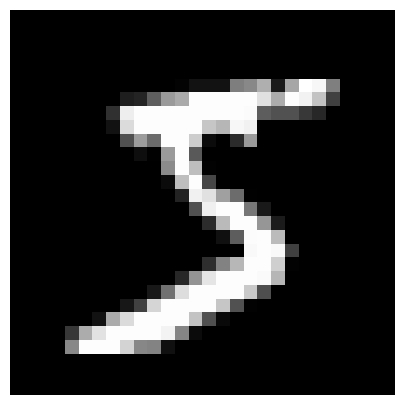

In [3]:
#샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap = "gray")
  plt.axis("off")
  plt.show()

plot_image(x_train, 0)

In [4]:
#훈련 셋과 검증 셋의 이미지 픽셀 최솟값, 최댓값 출력
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
#Normalization
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [6]:
#채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
#Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    #Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1), name = 'conv'),
    #Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name = 'pool'),
    #Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [9]:
#모델 컴파일
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 36s 18ms/step - loss: 0.2167 - accuracy: 0.9380 - val_loss: 0.0905 - val_accuracy: 0.9712
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0792 - accuracy: 0.9775 - val_loss: 0.0665 - val_accuracy: 0.9783
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0606 - accuracy: 0.9821 - val_loss: 0.0635 - val_accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0501 - accuracy: 0.9850 - val_loss: 0.0509 - val_accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0572 - val_accuracy: 0.9820
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0360 - accuracy: 0.9890 - val_loss: 0.0535 - val_accuracy: 0.9828
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0539 -

In [11]:
#모델 평가
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0546 - accuracy: 0.9838


[0.054622333496809006, 0.9837999939918518]

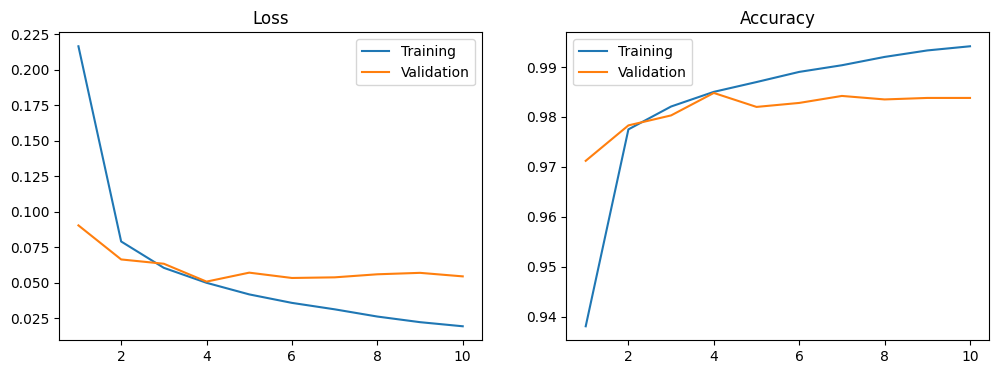

In [14]:
#그래프 시각화

def plot_loss_acc(history, epoch):

  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1, 2, figsize = (12, 4))

  axes[0].plot(range(1, epoch + 1), loss, label='Training')
  axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
  axes[0].legend(loc = 'best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch + 1), acc, label = 'Training')
  axes[1].plot(range(1, epoch + 1), val_acc, label = 'Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

In [15]:
#모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [16]:
#입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [17]:
#출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [18]:
#레이어
model.layers

In [19]:
#첫번째 레이어 선택
model.layers[0]

In [20]:
#첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [21]:
#첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [22]:
#첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-1.51137486e-02, -5.84750593e-01,  1.40020534e-01,
           -3.08727831e-01,  1.50949284e-01,  1.34706557e-01,
           -6.03125930e-01, -1.09887612e+00, -2.90615678e-01,
           -2.25481346e-01, -4.63878095e-01,  3.80919307e-01,
           -7.71852732e-01,  3.95336419e-01,  3.23636144e-01,
            3.59414905e-01, -4.89042848e-01,  7.63827205e-01,
            2.56036133e-01, -4.62809466e-02, -2.10057035e-01,
            6.85768481e-03, -6.20527118e-02, -1.40849996e+00,
            5.27368426e-01,  3.76526490e-02,  3.67857397e-01,
           -2.92843521e-01, -4.56241965e-01,  4.40633178e-01,
            1.47375345e-01, -1.82036757e-02]],
 
         [[ 3.58381987e-01, -3.20342094e-01,  1.38966992e-01,
           -4.61741179e-01, -5.25265574e-01,  7.69443512e-02,
            2.56142527e-01,  2.39853095e-02, -5.15877843e-01,
            2.93568611e-01, -5.89073375e-02,  1.40958965e-01,
           

In [23]:
#첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-1.51137486e-02, -5.84750593e-01,  1.40020534e-01,
          -3.08727831e-01,  1.50949284e-01,  1.34706557e-01,
          -6.03125930e-01, -1.09887612e+00, -2.90615678e-01,
          -2.25481346e-01, -4.63878095e-01,  3.80919307e-01,
          -7.71852732e-01,  3.95336419e-01,  3.23636144e-01,
           3.59414905e-01, -4.89042848e-01,  7.63827205e-01,
           2.56036133e-01, -4.62809466e-02, -2.10057035e-01,
           6.85768481e-03, -6.20527118e-02, -1.40849996e+00,
           5.27368426e-01,  3.76526490e-02,  3.67857397e-01,
          -2.92843521e-01, -4.56241965e-01,  4.40633178e-01,
           1.47375345e-01, -1.82036757e-02]],

        [[ 3.58381987e-01, -3.20342094e-01,  1.38966992e-01,
          -4.61741179e-01, -5.25265574e-01,  7.69443512e-02,
           2.56142527e-01,  2.39853095e-02, -5.15877843e-01,
           2.93568611e-01, -5.89073375e-02,  1.40958965e-01,
          -1.99547149e-02,  

In [24]:
#첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.01032197, -0.3323447 , -0.13716544, -0.17704375, -0.0945845 ,
       -0.26076064, -0.00991434, -0.01583145, -0.0081357 , -0.30138826,
       -0.0045739 , -0.2723519 , -0.14124022, -0.3758552 , -0.2766709 ,
       -0.29088828, -0.29001752,  0.05792715, -0.01751517, -0.17472963,
       -0.15948796, -0.00734179, -0.14749338,  0.11763144,  0.11181711,
       -0.01247057, -0.10423516, -0.21260823, -0.08021252, -0.01082419,
       -0.01326148, -0.15448219], dtype=float32)>

In [25]:
#레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [26]:
#샘플 이미지의 레이어별 출력을 리스트에 추가(첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs = model.input, outputs = [layer.output for layer in model.layers[:2]])

activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 173ms/step


2

In [27]:
#첫번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

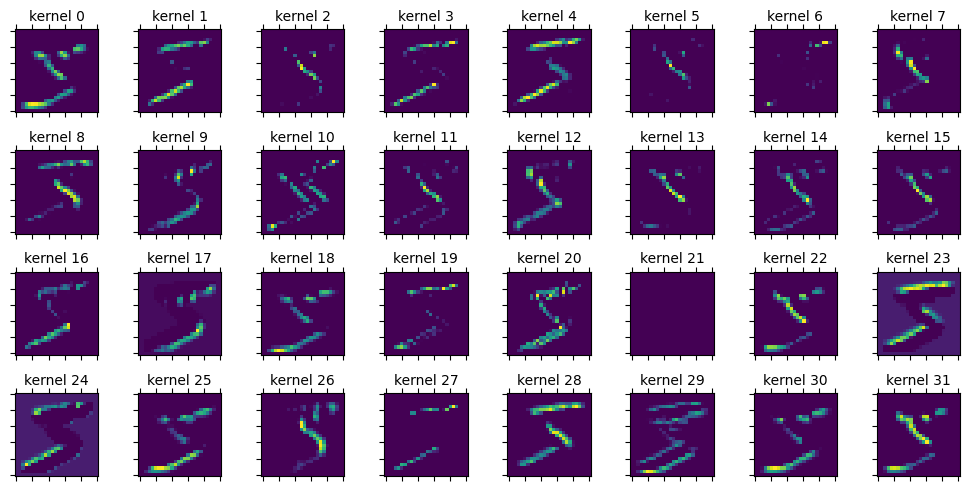

In [29]:
#Convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap = 'viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize = 10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible = False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible = False)

plt.tight_layout()
plt.show()

In [30]:
#두번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


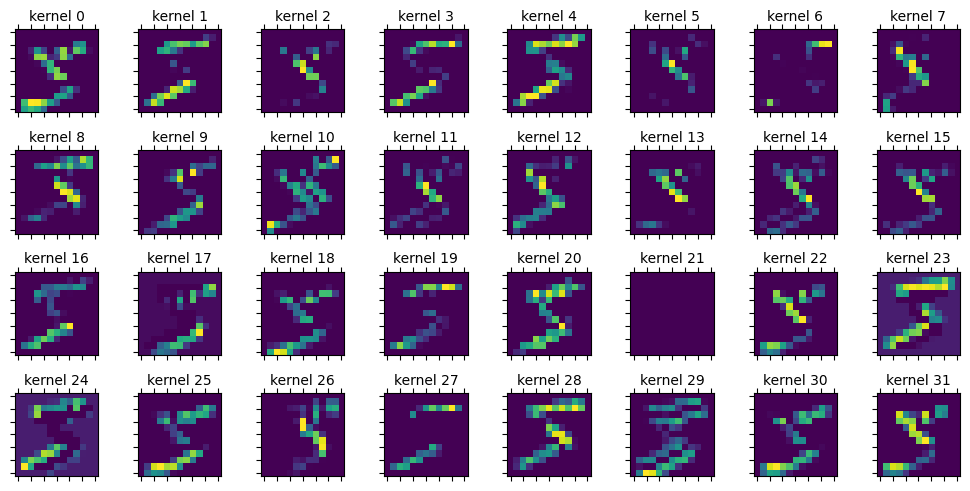

In [33]:
#시각화 -> 화소 크기가 굵어짐, 최대 풀링은 인근 픽셀들을 모아서 최대값으로 고정하기 때문에 픽셀 수는 줄이면서 특징을 더욱 강하게 드러냄
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap = 'viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize = 10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible = False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible = False)

plt.tight_layout()
plt.show()